<a href="https://colab.research.google.com/github/sethu-7/Sentiment_Analysis/blob/main/Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/content/drive/MyDrive/honors/amazon_reviews_us_Books_v1_02.tsv/amazon_reviews_us_Books_v1_02.tsv",sep='\t',on_bad_lines='skip')
data.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12076615,RQ58W7SMO911M,0385730586,122662979,Sisterhood of the Traveling Pants (Book 1),Books,4.0,2.0,3.0,N,N,this book was a great learning novel!,this boook was a great one that you could lear...,2005-10-14
1,US,12703090,RF6IUKMGL8SF,0811828964,56191234,The Bad Girl's Guide to Getting What You Want,Books,3.0,5.0,5.0,N,N,Fun Fluff,If you are looking for something to stimulate ...,2005-10-14
2,US,12257412,R1DOSHH6AI622S,1844161560,253182049,"Eisenhorn (A Warhammer 40,000 Omnibus)",Books,4.0,1.0,22.0,N,N,this isn't a review,never read it-a young relative idicated he lik...,2005-10-14
3,US,50732546,RATOTLA3OF70O,0373836635,348672532,Colby Conspiracy (Colby Agency),Books,5.0,2.0,2.0,N,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14
4,US,51964897,R1TNWRKIVHVYOV,0262181533,598678717,The Psychology of Proof: Deductive Reasoning i...,Books,4.0,0.0,2.0,N,N,Execellent cursor examination,Review based on a cursory examination by Unive...,2005-10-14


In [3]:
data.groupby("star_rating").describe()

customer_id                                                      \
                  count          mean           std         min         25%   
star_rating                                                                   
1.0            238211.0  4.417926e+07  1.077160e+07  12065385.0  38410727.0   
2.0            166377.0  4.572748e+07  9.670836e+06  12073265.0  42156601.0   
3.0            249913.0  4.572761e+07  9.624774e+06  12069570.0  42406406.0   
4.0            586149.0  4.547798e+07  9.840289e+06  12067609.0  42100785.0   
5.0           1864716.0  4.473104e+07  1.036527e+07  12066099.0  39776840.5   

                                                product_parent                \
                    50%         75%         max          count          mean   
star_rating                                                                    
1.0          49741770.0  52019299.0  53096580.0       238211.0  5.011968e+08   
2.0          50393621.0  52243752.0  53096589.0       166377.0  5.013833e+08   
3.0          50266459.0  52168121.0  53096583.0       249913.0  4.997625e+08   
4.0          50081208.0  52058184.0  53096589.0       586149.0  5.010970e+08   
5.0          49921547.5  51946226.0  53096589.0      1864716.0  5.021818e+08   

             ... helpful_votes          total_votes                        \
             ...           75%      max       count       mean        std   
star_rating  ...                                                            
1.0          ...          15.0   4452.0    238211.0  26.535827  41.446966   
2.0          ...          11.0   3517.0    166377.0  16.691568  32.545917   
3.0          ...           9.0   2472.0    249913.0  12.246394  28.064666   
4.0          ...           8.0   3049.0    586149.0   9.425030  22.267015   
5.0          ...          10.0  15835.0   1864716.0  11.167171  30.274066   

                                            
             min  25%   50%   75%      max  
star_rating                                 
1.0          0.0  6.0  15.0  32.0   4936.0  
2.0          0.0  4.0   9.0  19.0   3836.0  
3.0          0.0  2.0   6.0  14.0   2833.0  
4.0          0.0  2.0   4.0  10.0   3232.0  
5.0          0.0  2.0   5.0  12.0  16352.0  

[5 rows x 32 columns]

In [4]:
# A dependency of the preprocessing for BERT inputs
!pip install -U "tensorflow-text==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 50.6 MB/s eta 0:00:00


In [5]:
!pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 16.1 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=233395b2d1dd66e86f6fd96726a3644574a482786a668218d4a952e930b2a4bd
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [6]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [7]:
df=pd.DataFrame()
df2 = df.drop_duplicates(keep=False)

In [8]:
rate=[]
data['star_rating']=data['star_rating'][:10000]

for i in data['star_rating']:
  if (i<2.5):
    rate.append(0)
  else:
    rate.append(1)


print(rate[:100])


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]


In [9]:
pd.DataFrame(rate).value_counts()

1    3104119
0       1251
dtype: int64

In [10]:
x=data['review_body']
y=pd.DataFrame(rate)



In [11]:
y.describe()

,0
count,3.105370e+06
mean,9.995971e-01
std,2.006710e-02
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


Remove redundant

In [12]:
x=x[:10000]
y=y[:10000]

In [13]:
import random
samp=random.sample(range(0,10000),10000)

In [14]:
x=x.loc[samp]
y=y.loc[samp]

In [15]:
x

3993    Sunny Daze: The Humorous Misadventures of a Tr...
193     The Ogham and The Universal Truth of the Trees...
7342    If you can suspend your expectation of what re...
8775    Mr Sewell uses interviews and declassified pap...
9687    A sprawling tale about time travel that grabs ...
                              ...                        
8154    Once upon a time a college degree was position...
7296    This is a great book for a student like myself...
2732    Barbie Jenkins is a wonderful writer, weaving ...
2422    I am thrilled to have this beautifully present...
5767    The Rizzoli Contract is described as a literar...
Name: review_body, Length: 10000, dtype: object

In [16]:
y

,0
3993,1
193,1
7342,1
8775,1
9687,1
...,...
8154,1
7296,1
2732,1
2422,1


In [17]:
x_train=x[:8000]
y_train=y[0:8000]

In [18]:
x_train

3993    Sunny Daze: The Humorous Misadventures of a Tr...
193     The Ogham and The Universal Truth of the Trees...
7342    If you can suspend your expectation of what re...
8775    Mr Sewell uses interviews and declassified pap...
9687    A sprawling tale about time travel that grabs ...
                              ...                        
2875    Okay all, here's my take on this book.  First ...
5992    Linear Algebra by Kenneth M Hoffman, is an exc...
1925    I loved the story and especially loved the pic...
1954    Even though I was dx-ed 8-years ago and know a...
6904    Shelly was my teacher in 3rd grade and this bo...
Name: review_body, Length: 8000, dtype: object

In [19]:
x_test=x[8000:]
y_test=y[8000:]

In [20]:
x_val_train=x_train[:6400]
y_val_train=y_train[:6400]

x_val_test=x_train[6400:]
y_val_test=y_train[6400:]


In [21]:
for i in x_train:
  for j in x_test:
    if(i==j):
      print("not unique")
      print(i)
      print(j)

not unique
Being willing to see if i missed anything with regards to Easter and Christmas, and the thought process of celebrating them or not, and seeing a few comments on the Internet about how \\"brave and bold\\" Mr. Woodrow was for turning his position around, i purchased several (5 or so) of his newest booklets.  After reading through Brother (yes i said Brother) Woodrow's booklets of \\"Easter Is It Pagan\\" and \\"Christmas Reconsidered\\" i've reached the following conclusion.  Brother Woodrow is using the famous \\"straw-man argument methodology\\" that writers, salesmen, speakers, and even magicians utilize.  When i entitled this \\"slight of hand\\" i didn't mean that Mr. Woodrow was being purposefully deceptive, i meant he moves the reader from their grounded truth and the reader can end up worrying about the detailed scarecrow.  You bring up something interesting, focus on it INSTEAD OF the plain truths, and eventually folks forget the plain truths they held dear.  A straw

In [22]:
for i in x_val_train:
  for j in x_val_test:
    if(i==j):
      print("not unique")
      print(i)
      print(j)

not unique
I work in the video game industry and am working on a game that has a railroad level in it. These model railroad books are the perfect reference! The whole book is filled with great ideas and each idea is supported with real photographs. A+ One of the best  <br />\\"reference\\" books I've ever purchased!
I work in the video game industry and am working on a game that has a railroad level in it. These model railroad books are the perfect reference! The whole book is filled with great ideas and each idea is supported with real photographs. A+ One of the best  <br />\\"reference\\" books I've ever purchased!
not unique
The big downside to these volumes is that they eventually split in half! However... I also own a stack of other film encyclopedias but for weight and manageability this is the best of the lot. The book is around 2 inches thick - but is the size of a novel and you can hold it in one hand. It is a full resource (with over 18,000 titles!), easy to carry around and 

In [23]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [24]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [25]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_word_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [27]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.76262873  0.9928099  -0.18611872  0.36673853  0.1523371   0.65504426
  0.9681154  -0.94862705  0.00216182 -0.9877732   0.06842728 -0.97630584]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.28946307  0.34321266  0.33231518 ...  0.21300897  0.71020764
  -0.05771176]
 [-0.2874206   0.3198098  -0.23018597 ...  0.5845501  -0.21329726
   0.72692066]
 [-0.6615712   0.68876785 -0.8743292  ...  0.10877268 -0.2617322
   0.4785534 ]
 ...
 [-0.22561154 -0.28925663 -0.07064398 ...  0.47566003  0.8327717
   0.40025344]
 [-0.29824272 -0.27473173 -0.05450511 ...  0.48849759  1.0955356
   0.18163322]
 [-0.44378266  0.00930682  0.07223728 ...  0.17290092  1.1833241
   0.07898061]]


In [28]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [29]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.55627394]], shape=(1, 1), dtype=float32)


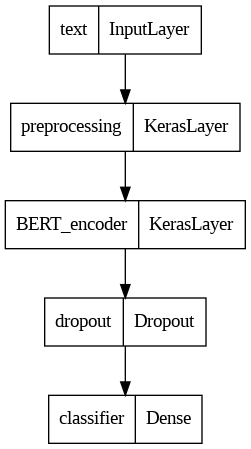

In [30]:
tf.keras.utils.plot_model(classifier_model)

LOSS Function used

In [31]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [32]:
xtrain=pd.DataFrame()

In [33]:
epochs = 5
steps_per_epoch = len(x_val_train)
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

print(steps_per_epoch)

6400


In [34]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

# classifier_model.compile(optimizer='adamw', loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
x_val_train.shape

(6400,)

In [44]:
#  print(f'Training model with {tfhub_handle_encoder}')
# history = classifier_model.fit(x_val_train,
#                                y_val_train,
#                                epochs=epochs)

In [ ]:
# y_val_train=y_val_train.to_numpy() done already


In [ ]:
# y_val_test=y_val_test.to_numpy() done already

In [47]:
history = classifier_model.fit(x=x_val_train,
                               y=y_val_train,
                               validation_data=(x_val_test, y_val_test),
                               epochs=epochs)

Epoch 1/5
200/200 [==============================] - 64s 318ms/step - loss: 0.0431 - binary_accuracy: 0.9870 - val_loss: 0.3808 - val_binary_accuracy: 0.9237
Epoch 2/5
200/200 [==============================] - 58s 291ms/step - loss: 0.0363 - binary_accuracy: 0.9883 - val_loss: 0.3984 - val_binary_accuracy: 0.9181
Epoch 3/5
200/200 [==============================] - 59s 293ms/step - loss: 0.0233 - binary_accuracy: 0.9931 - val_loss: 0.4703 - val_binary_accuracy: 0.9137
Epoch 4/5
200/200 [==============================] - 129s 649ms/step - loss: 0.0252 - binary_accuracy: 0.9917 - val_loss: 0.5098 - val_binary_accuracy: 0.9181
Epoch 5/5
200/200 [==============================] - 58s 291ms/step - loss: 0.0105 - binary_accuracy: 0.9962 - val_loss: 0.5951 - val_binary_accuracy: 0.9150


In [48]:
loss, accuracy = classifier_model.evaluate(x_test,y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

63/63 [==============================] - 8s 132ms/step - loss: 0.6896 - binary_accuracy: 0.9035
Loss: 0.6896259784698486
Accuracy: 0.9035000205039978
